In [17]:
import pandas as pd
from pyspec.plot.plot_mass_spectrum import plot_head_to_tail_mass_spectra

from lcb.cisvis.identify import identify_compound
%matplotlib inline
from cisclient.client import CISClient
from lcb.cisvis.spectra import generate_similarity_plot, generate_spectra_plot, to_dataframe, generate_histogram_intensity, \
    generate_histogram_accurate_mass, generate_histogram_ri, generate_similarity_histogram, generate_head_tail_plot

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]


In [18]:
# these are parameterized over papermill
cis_url = 'https://dev-api.metabolomics.us/cis'
cis_api_token = 'rDJfRW6ilG2WooOR72AaE3NqL4m23WvY6ub4FEoS'
splash = 'splash10-02vl-2490207000-619a424bac926e7935e1'
splash = 'splash10-014i-0290100000-a7521c286191b69326fe'
splash = 'splash10-03dl-0391080000-99f283d96c6eb943de73'
splash = 'splash10-0002-0900000000-f77af051692a6d6c2154'

library = 'soqe[M-H] | QExactive | test | negative'

In [19]:

client =  CISClient(cis_url, cis_api_token)
compound = client.get_compound(library=library,splash=splash)
members = list( map(lambda member: client.get_compound(library=library,splash=member),client.get_members(library=library,splash=splash)))

# Compound Generation report

Welcome to the compound generation overview report. The main purpose is to help you diagnose the generation of compounds as well as get a better understanding why it was generated in the first place.

In [20]:
to_dataframe([compound]).drop(['spectrum','ms_level','required_for_correction','inchi_key','splash','unique_mass'],axis=1)

,id,accurate_mass,target_type,matrix,method,retention_index,sample,name,precursor_mass
0,823740,165.040237,CONFIRMED_CONSENSUS,,soqe[M-H] | QExactive | test | negative,46.389867,consensus spectrum from 12 samples,unknown_165.0402_46.3899,165.040237


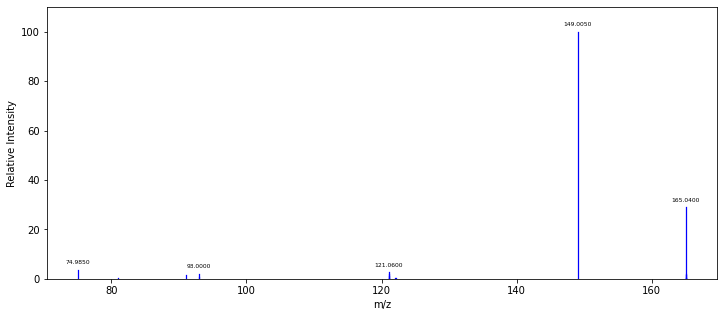

In [21]:
generate_spectra_plot(compound=compound)

This is a histogram plot of the retention index of all the members making up this compound. Please be aware that due to settings the range will never exceed these boundaeries

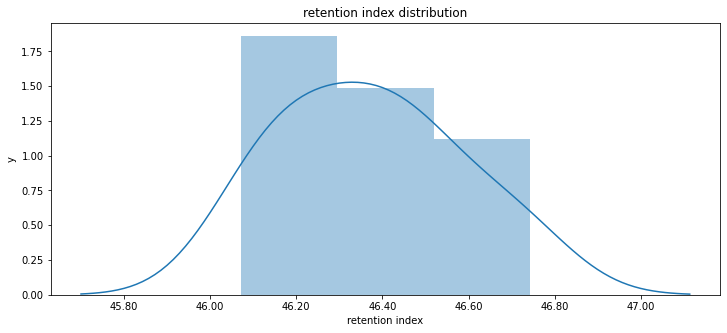

In [22]:
generate_histogram_ri(members)

This is a histogram plot of the accurate mass of all the members making up this compound. Please be aware that due to settings the range will never exceed these boundaeries

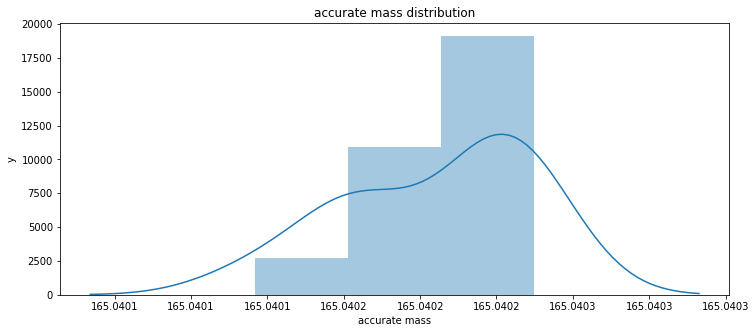

In [23]:
generate_histogram_accurate_mass(members)

This is a histogram plot of the basepeak intensity of all the members making up this compound. There are no related settings which affect this, except for
for a required min intensity setting for the Pre Cursor Mass.

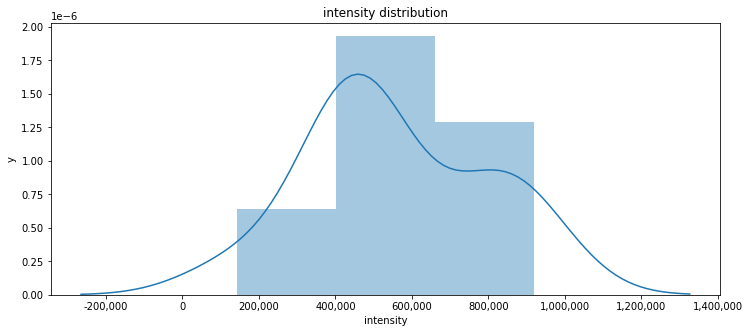

In [24]:
generate_histogram_intensity(members)

This plot demonstrates a similarity plot of all spectra making up this compond against each other. The purpose is mostly for diagnostics and finetuning of settings as well as discovering possible outliers.

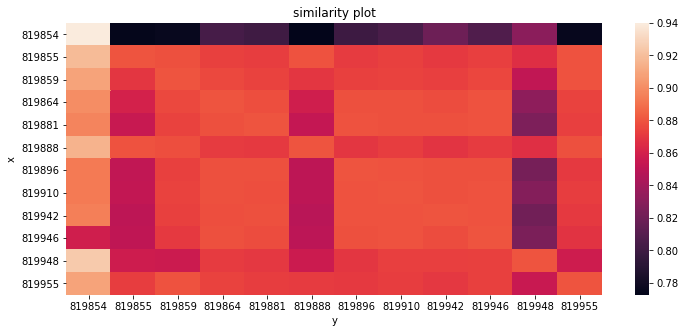

In [25]:
generate_similarity_plot(members)

This is a tabular representation of all members of this compound, with their most important properties.

In [26]:
to_dataframe(members).drop(['accurate_mass','spectrum','method','ms_level','required_for_correction','inchi_key','target_type','splash','unique_mass','name'],axis=1)

,id,matrix,retention_index,sample,precursor_mass
0,819864,,46.389867,NIH_Lip_Std_CSH_NEG_Preinj_06,165.040237
1,819946,,46.335515,NIH_Lip_Std_CSH_NEG_Preinj_06,165.040237
2,819942,,46.119069,NIH_Lip_Std_CSH_NEG_Preinj_06,165.040237
3,819948,,46.742595,NIH_Lip_Std_CSH_NEG_Preinj_06,165.040222
4,819888,,46.485881,NIH_Lip_Std_CSH_NEG_Preinj_06,165.040222
5,819859,,46.279967,NIH_Lip_Std_CSH_NEG_Preinj_06,165.040222
6,819881,,46.224383,NIH_Lip_Std_CSH_NEG_Preinj_06,165.040222
7,819955,,46.440418,NIH_Lip_Std_CSH_NEG_Preinj_06,165.040192
8,819855,,46.526043,NIH_Lip_Std_CSH_NEG_Preinj_06,165.040176
9,819896,,46.170512,NIH_Lip_Std_CSH_NEG_Preinj_06,165.040176


819864
819946
819942
819948
819888
819859
819881
819955
819855
819896
819910
819854


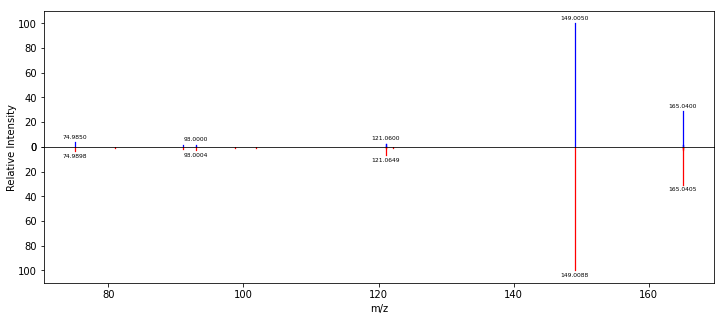

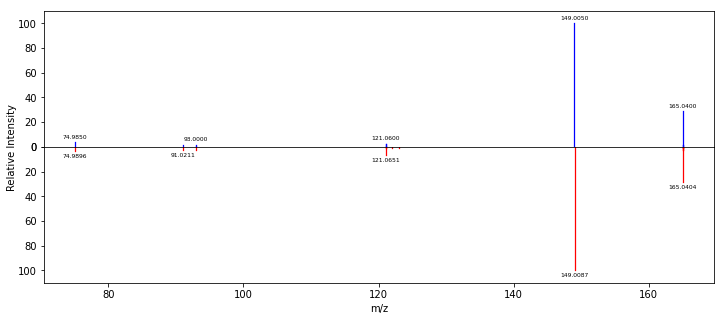

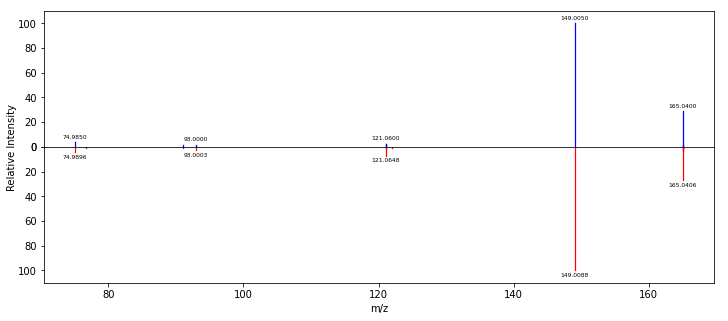

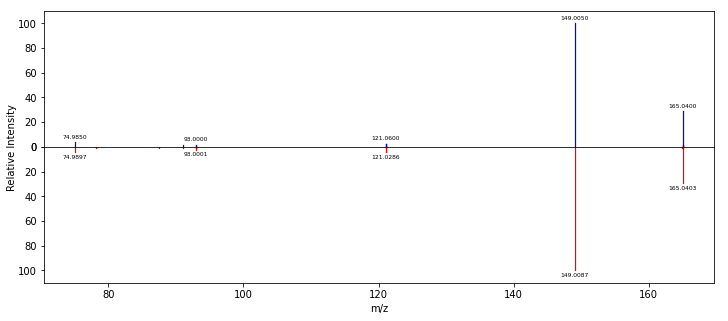

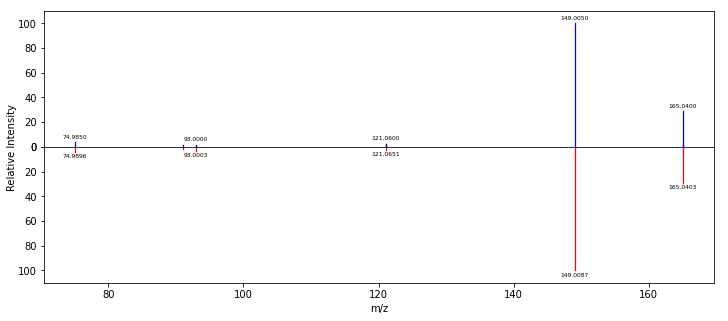

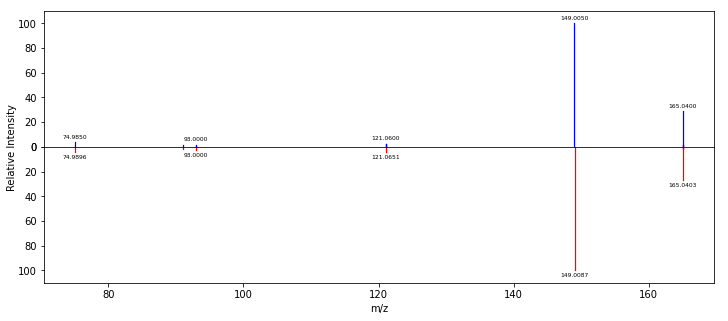

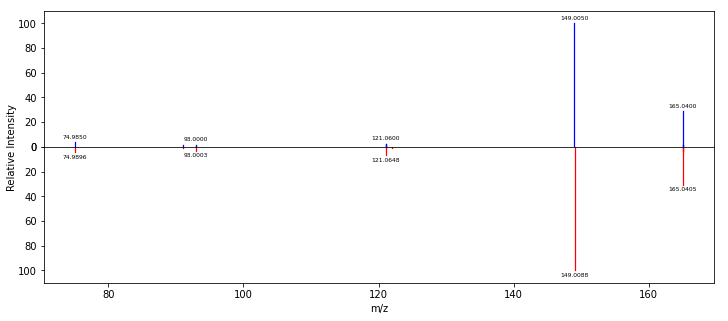

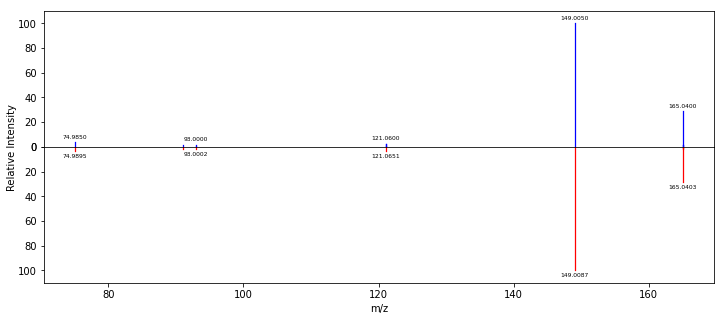

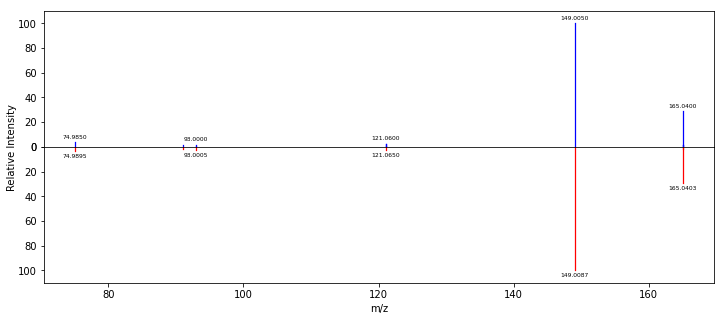

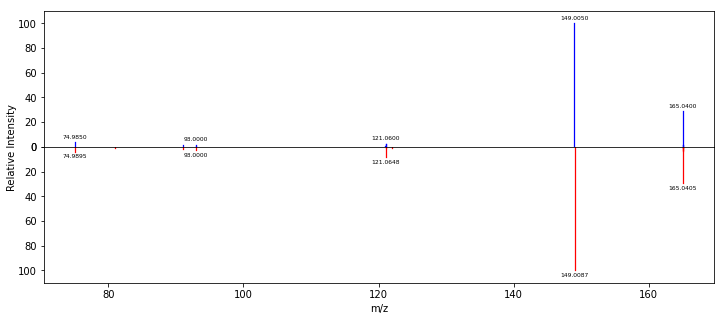

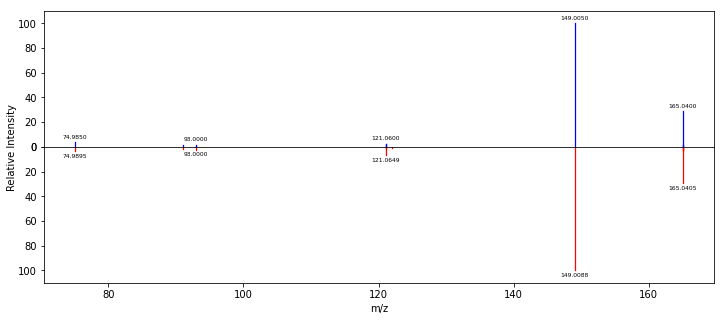

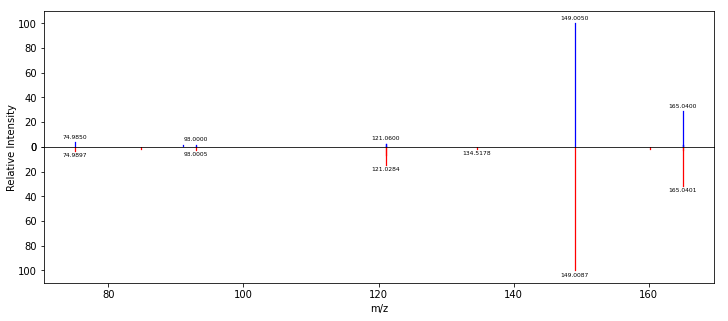

In [27]:

for member in members:


    print(member['id'])
    generate_head_tail_plot(compound=compound,member=member)

This is an overview of the similarity distribution of all members for this compoaund against the consensus spectra. The consensus spectra includes all if it's members in it!

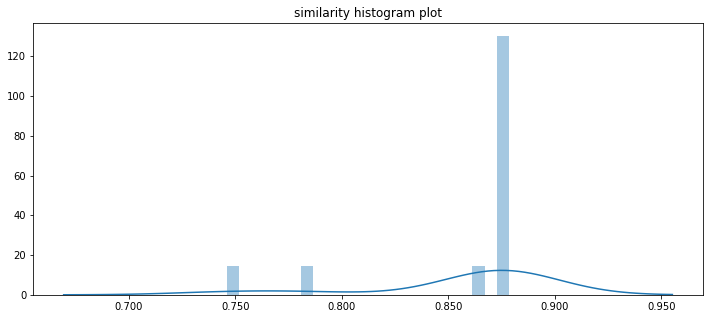

In [28]:
generate_similarity_histogram(compound,members)

Below here you can find a quick similarity search of potential identifications of this particular compound.

In [29]:
result = identify_compound(compound)
df = pd.DataFrame(result)

if 'spectrum' in df.columns:
    df = df.drop(['spectrum'],axis=1)
else:
    print("sorry no similarity hits found!")

In [30]:
df

,name,id,inchi_key,splash,score
0,raspberry ketone,VF-NPL-QEHF000863,SFUCGABQOMYVJW-UHFFFAOYSA-N,splash10-00kb-1900000000-abdfe399c218164630bd,0.623461
1,raspberry ketone,VF-NPL-QEHF000864,SFUCGABQOMYVJW-UHFFFAOYSA-N,splash10-0002-5900000000-b8e156e82d993f956917,0.585060
2,raspberry ketone,VF-NPL-QEHF000862,SFUCGABQOMYVJW-UHFFFAOYSA-N,splash10-014j-1900000000-ced6a26e5ce2b890adff,0.503183


In [31]:
df

,name,id,inchi_key,splash,score
0,raspberry ketone,VF-NPL-QEHF000863,SFUCGABQOMYVJW-UHFFFAOYSA-N,splash10-00kb-1900000000-abdfe399c218164630bd,0.623461
1,raspberry ketone,VF-NPL-QEHF000864,SFUCGABQOMYVJW-UHFFFAOYSA-N,splash10-0002-5900000000-b8e156e82d993f956917,0.585060
2,raspberry ketone,VF-NPL-QEHF000862,SFUCGABQOMYVJW-UHFFFAOYSA-N,splash10-014j-1900000000-ced6a26e5ce2b890adff,0.503183


In [32]:
df

,name,id,inchi_key,splash,score
0,raspberry ketone,VF-NPL-QEHF000863,SFUCGABQOMYVJW-UHFFFAOYSA-N,splash10-00kb-1900000000-abdfe399c218164630bd,0.623461
1,raspberry ketone,VF-NPL-QEHF000864,SFUCGABQOMYVJW-UHFFFAOYSA-N,splash10-0002-5900000000-b8e156e82d993f956917,0.585060
2,raspberry ketone,VF-NPL-QEHF000862,SFUCGABQOMYVJW-UHFFFAOYSA-N,splash10-014j-1900000000-ced6a26e5ce2b890adff,0.503183


In [13]:
df

sorry no similarity hits found!


In [14]:
df

""
